# **The Battle of Neighborhoods (Week 1)**

## **Neighborhoods of Toronto**

### **Part One**

I used an older version of the wikipedia page (27 February 2020), because the new table is diferent and is not matching with the assignment table.

In [1]:
import pandas as pd
import numpy as np
import bs4

table = pd.read_html("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=942851379")[0]

In [2]:
table.rename(columns={"Postcode": "PostalCode", "Neighbourhood": "Neighborhood"}, inplace=True)
table

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


Ignore cells with a borough that is Not assigned.

In [3]:
table = table[table.Borough != 'Not assigned']
table

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
All Neighborhoods are OK.

In [4]:
table[table.Neighborhood == 'Not assigned']

,PostalCode,Borough,Neighborhood


Neighborhoods with same Postal code are combined into one row, with the neighborhoods separated with a comma.

In [5]:
tableGroups = table.groupby(['PostalCode','Borough'])['Neighborhood'].apply(', '.join).reset_index().sort_values(by=['PostalCode'])
tableGroups

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


I check that the table size, with removed Postalcode duplicates, match with the new table.

In [6]:
table.drop_duplicates(subset=['PostalCode']).sort_values(by=['PostalCode'])

,PostalCode,Borough,Neighborhood
10,M1B,Scarborough,Rouge
26,M1C,Scarborough,Highland Creek
41,M1E,Scarborough,Guildwood
52,M1G,Scarborough,Woburn
61,M1H,Scarborough,Cedarbrae
...,...,...,...
149,M9N,York,Weston
162,M9P,Etobicoke,Westmount
175,M9R,Etobicoke,Kingsview Village
227,M9V,Etobicoke,Albion Gardens


In [7]:
tableGroups.shape

(103, 3)

**Part Two**

In [8]:
cords = pd.read_csv("Geospatial_Coordinates.csv")

In [9]:
cords.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
cords

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [10]:
tableGroups = tableGroups.merge(cords)

In [11]:
tableGroups

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437


### **Part Three**

**Clustering the Neighborhoods in Toronto**

In [12]:
from geopy.geocoders import Nominatim

address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_neigh")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [13]:
import folium

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, Neighborhood in zip(tableGroups['Latitude'], tableGroups['Longitude'], tableGroups['Borough'], tableGroups['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [14]:
CLIENT_ID = 'PVUW5HNTQXWESDC2DGOZEFAOIXTPY25R034HUBSBOFBPOSWK' # your Foursquare ID
CLIENT_SECRET = 'ULLWEQ2BYKDIYH3V4CZIUTG3DAYUMIJI0A5E4BOUVUQALEDJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PVUW5HNTQXWESDC2DGOZEFAOIXTPY25R034HUBSBOFBPOSWK
CLIENT_SECRET:ULLWEQ2BYKDIYH3V4CZIUTG3DAYUMIJI0A5E4BOUVUQALEDJ


Radius and Limit for the number of avenues returned by Foursquare API

In [15]:
import requests

LIMIT = 100

radius = 500


**Function to get the top 100 venues within a radius of 500 meters by Neighborhood**

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
toronto_venues = getNearbyVenues(names=tableGroups['Neighborhood'],
                                   latitudes=tableGroups['Latitude'],
                                   longitudes=tableGroups['Longitude']
                                  )



Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [18]:
print(toronto_venues.shape)
toronto_venues.head()

(2172, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,T Hamilton & Son Roofing Inc,43.807985,-79.198194,Construction & Landscaping
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Great Shine Window Cleaning,43.783145,-79.157431,Home Service
4,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar


Venues in neighborhoods:

In [19]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",9,9,9,9,9,9
"Alderwood, Long Branch",10,10,10,10,10,10
...,...,...,...,...,...,...
Willowdale West,8,8,8,8,8,8
Woburn,4,4,4,4,4,4
"Woodbine Gardens, Parkview Hill",11,11,11,11,11,11


In [20]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


**Neighborhood Analisis**

In [21]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(2172, 273)


,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
97,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
98,"Woodbine Gardens, Parkview Hill",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
99,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.00


Top 5 most common venues neighborhood

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Bakery,Deli / Bodega,Hotel,Bar,Concert Hall
1,Agincourt,Skating Rink,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Liquor Store,Fried Chicken Joint,Sandwich Place,Beer Store,Fast Food Restaurant,Pharmacy,Donut Shop,Doner Restaurant
4,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Pharmacy,Pub,Skating Rink,Pool,Sandwich Place,Gym,Dance Studio,Distribution Center


<a id='item4'></a>

**K-means Clustering**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

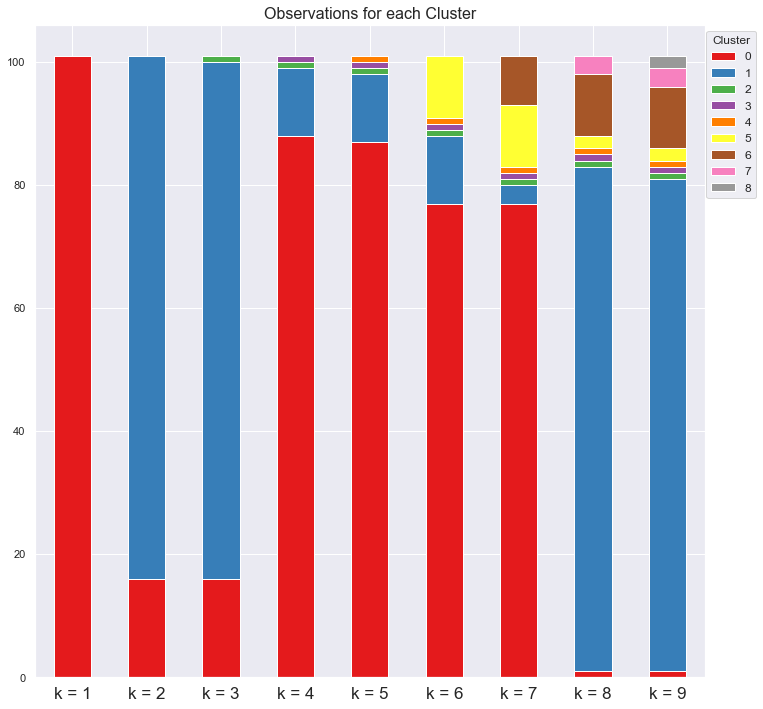

In [432]:
from sklearn.cluster import KMeans

cmap = plt.cm.get_cmap('Set1')

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(toronto_grouped.drop('Neighborhood', 1))
    distortions.append(kmeanModel.inertia_)
    
    if k == 1:
        ClustersCount = pd.Series(kmeanModel.labels_).value_counts().reset_index()
        ClustersCount = ClustersCount.rename(columns={"index": "cluster", 0: "k = "+str(k)})
    else:
        ClustersCount = ClustersCount.merge(
            pd.Series(kmeanModel.labels_).value_counts().reset_index().rename(columns={"index": "cluster", 0: "k = "+str(k)}),
                                                            how='outer')

import seaborn as sns
sns.set()        
        
ax  = ClustersCount.fillna(0).set_index('cluster').T.plot.bar(figsize=(12,12),stacked=True, cmap = cmap)

patches, labels = ax.get_legend_handles_labels()

ax.set_title(label='Observations for each Cluster', fontsize = 16)

ax.legend(patches, labels, title='Cluster', loc='upper center', fontsize=12, bbox_to_anchor=(1.04, 1))

plt.xticks(fontsize=17, rotation=0)

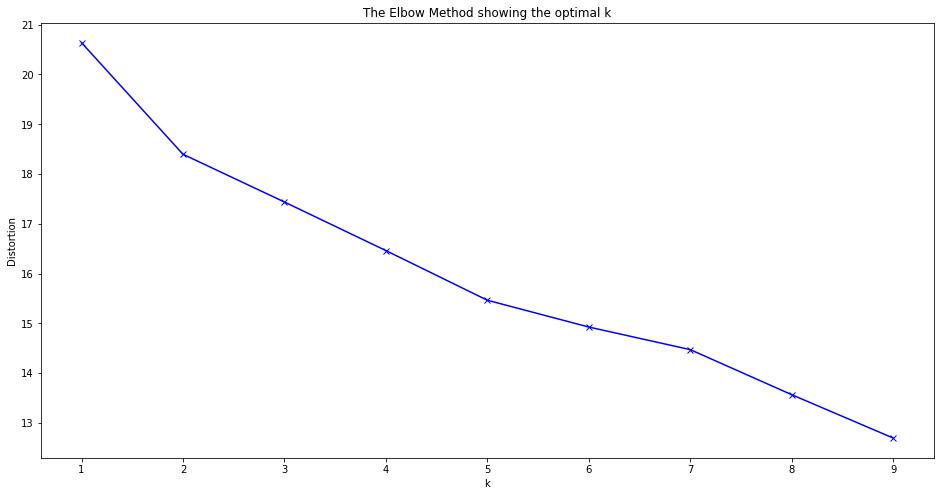

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the graph above using the Elbow Method, there is not a definitive answer for the best number of K and is better to experiment

In [216]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 6, 5, 5, 0, 0, 0, 0, 0])

Clusters of the top 10 venues for each neighborhood

In [217]:
if 'Cluster Labels' in neighborhoods_venues_sorted.columns.to_list():
    neighborhoods_venues_sorted.drop(['Cluster Labels'], 1, inplace=True)

In [218]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Gym,Thai Restaurant,Bakery,Deli / Bodega,Hotel,Bar,Concert Hall
1,Agincourt,Skating Rink,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Liquor Store,Fried Chicken Joint,Sandwich Place,Beer Store,Fast Food Restaurant,Pharmacy,Donut Shop,Doner Restaurant
4,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Pharmacy,Pub,Skating Rink,Pool,Sandwich Place,Gym,Dance Studio,Distribution Center


In [219]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = tableGroups

# merge toronto_grouped with tableGroups to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.dropna(inplace=True)

toronto_merged = toronto_merged.astype({'Cluster Labels': 'int32'})

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(101, 16)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0,Construction & Landscaping,Fast Food Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Women's Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0,History Museum,Golf Course,Bar,Home Service,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Medical Center,Breakfast Spot,Mexican Restaurant,Bank,Intersection,Rental Car Location,Electronics Store,Drugstore,Donut Shop,Doner Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Indian Restaurant,Korean Restaurant,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Fried Chicken Joint,Gas Station,Bank,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Bakery,Hakka Restaurant,Lounge,Drugstore


In [220]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

**Clusters Analisis**

In [221]:
def plotVenueCounts(clus, name = 'Name', size=(10,10), minimum = 2):
    
    global clusF, s_sort
    
    cmap = plt.cm.get_cmap('winter')

    clusF = clus.iloc[:,1:]['1st Most Common Venue'].value_counts().reset_index()

    for c in clus.iloc[:,2:]:
        clusF = clusF.merge(clus[c].value_counts().reset_index(), how='outer')

    clusF = clusF.set_index('index')
    
    clusF = clusF.fillna(0).astype('int32')

    s_sort = clusF.T.sum().sort_values(ascending=True)

    ax = plt.gca()
    
    ax.locator_params(integer=True)
    
    s_sort.index.names = ["Venues"]

    clusF.reindex(index=s_sort[s_sort >= minimum].index).plot.barh(figsize=size, stacked=True, cmap=cmap, ax=ax, title='Most Common Venues for Cluster '+name)

In [536]:
toronto_merged.shape[0]

101

In [557]:
round(toronto_merged['Cluster Labels'].value_counts()/toronto_merged.shape[0] * 100,2).sort_index()

0    76.24
1     2.97
2     0.99
3     0.99
4     0.99
5     9.90
6     7.92
Name: Cluster Labels, dtype: float64

#### Cluster 1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,0,Construction & Landscaping,Fast Food Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Women's Store
1,Scarborough,0,History Museum,Golf Course,Bar,Home Service,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
2,Scarborough,0,Medical Center,Breakfast Spot,Mexican Restaurant,Bank,Intersection,Rental Car Location,Electronics Store,Drugstore,Donut Shop,Doner Restaurant
3,Scarborough,0,Coffee Shop,Indian Restaurant,Korean Restaurant,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
4,Scarborough,0,Fried Chicken Joint,Gas Station,Bank,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Bakery,Hakka Restaurant,Lounge,Drugstore
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Etobicoke,0,Locksmith,Baseball Field,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Event Space
92,Etobicoke,0,Grocery Store,Fast Food Restaurant,Discount Store,Burrito Place,Burger Joint,Thrift / Vintage Store,Supplement Shop,Social Club,Convenience Store,Hardware Store
95,Etobicoke,0,Coffee Shop,Pet Store,Beer Store,Pizza Place,Liquor Store,Café,Cosmetics Shop,Dog Run,Dim Sum Restaurant,Diner
97,North York,0,Baseball Field,Fabric Shop,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


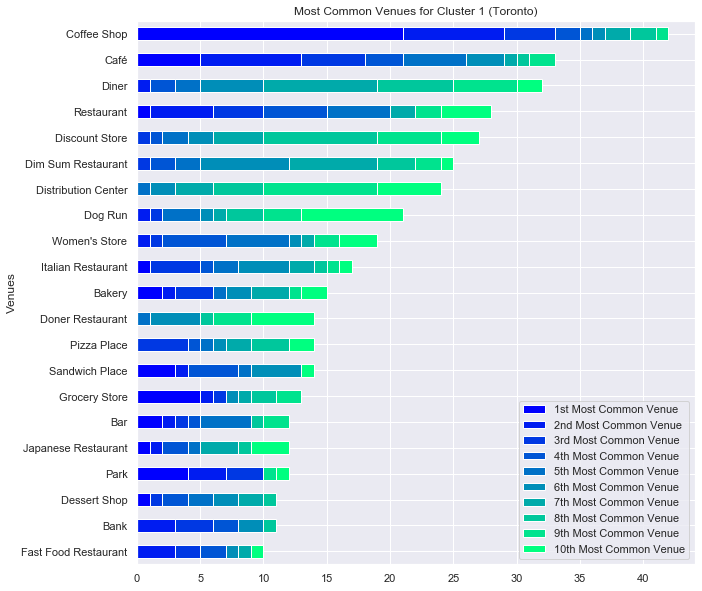

In [534]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '1 (Toronto)', (10,10), 10)

clus

With 76% of Neighborhoods, the fisrt cluster is the main cluster. Its dominated by Cafes (Coffee Shop and Café), in second place Restaurants (and Diners), especially Chinese (Dim Sum), Italian, Doner (Turkish) and Japanese, in that order. Followed by discount stores, distribution centers and Women's stores.

#### Cluster 2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,North York,1,Park,Bank,Convenience Store,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Department Store
31,North York,1,Grocery Store,Bank,Park,College Stadium,Colombian Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
40,East York,1,Park,Convenience Store,Coffee Shop,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store


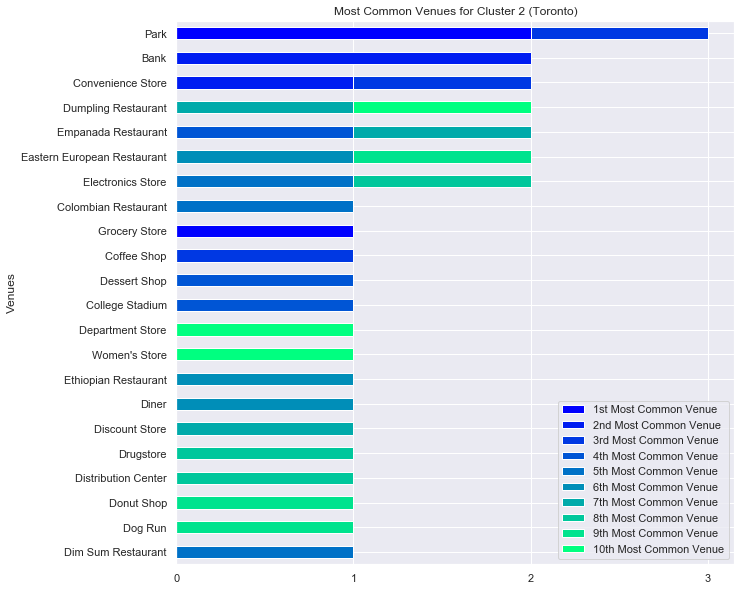

In [533]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '2 (Toronto)', (10,10), 1)

clus

Cluster 2 represents 3% of the Neighborhoods. Its dominated by Parks, Banks, Convenience (general) and Electronic stores. Empanadas (hispanic), Dumpling (mainly chinese?), Eastern european restaurants, as well Colombian, Ethiopian and Dim Sum (chinese) restaurants.

#### Cluster 3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,North York,2,Cafeteria,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store


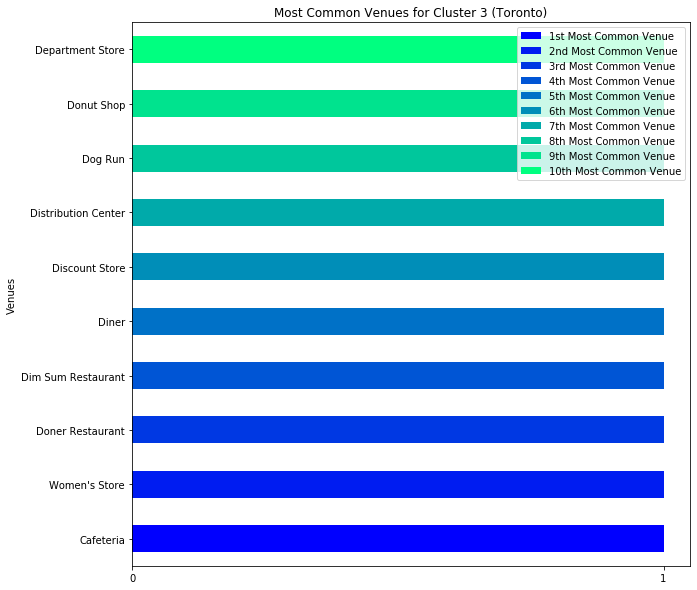

In [224]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '3 (Toronto)', (10,10), 1)

clus

Cluster 3 forms only one area. Dominated by Cafeterias, Women's Stores, Doner (Turkish), Dim Sum (Chinese) and Diner Restaurants.

#### Cluster 4

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Etobicoke,3,Golf Course,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop


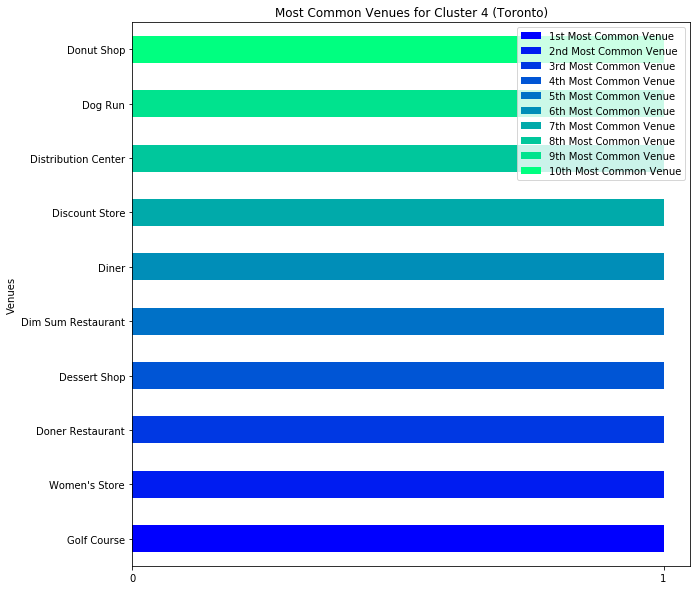

In [225]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '4 (Toronto)', (10,10), 1)

clus

Cluster 4 forms only one area. Its main feature are Golf Courses, very similar to cluster 3, its followed by Women's stores, Doner (Turkish), Dim Sum (Chinese) restaurants, Diner and Dessert Shops.

#### Cluster 5

**Family places, women stores, food.**

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,4,Playground,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop


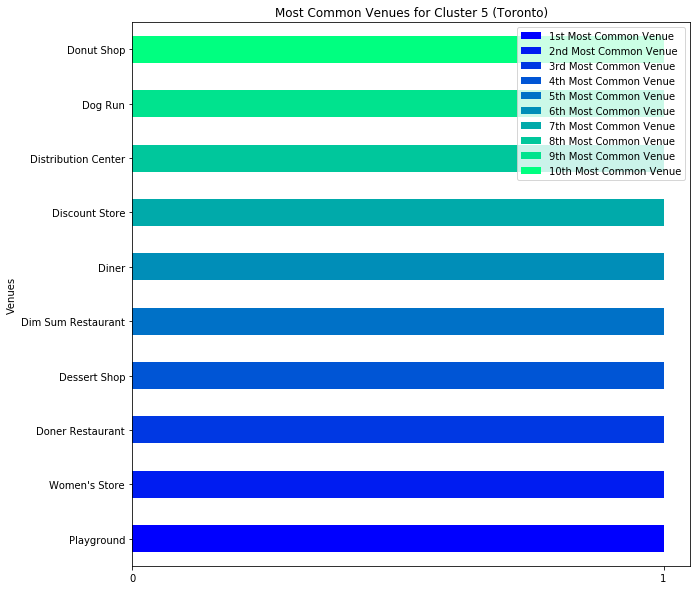

In [226]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '5 (Toronto)', (10,10), 1)

clus

Clusters 3, 4 and 5 are very similar, each one with 1% or one data point. Cluster 3 is dominated by Cafeterias, cluster 4 Golf Courses and Cluster 5 Playgrounds. Then followed by Women's Stores, Doner Restaurants, Dim Sum (chinese) restaurants, Diner and Discount Stores.

#### Cluster 6

**Family places, women stores, food.**

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Scarborough,5,Pharmacy,Pizza Place,Gas Station,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Convenience Store,Bank,Chinese Restaurant,Fried Chicken Joint
34,North York,5,Coffee Shop,Pizza Place,Intersection,Hockey Arena,Portuguese Restaurant,Women's Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
35,East York,5,Pizza Place,Bus Line,Intersection,Gym / Fitness Center,Pet Store,Pharmacy,Gastropub,Bank,Fast Food Restaurant,Athletics & Sports
63,Central Toronto,5,Pool,Garden,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store
72,North York,5,Park,Pizza Place,Pub,Japanese Restaurant,Drugstore,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Dance Studio
89,Etobicoke,5,Pizza Place,Coffee Shop,Pharmacy,Pub,Skating Rink,Pool,Sandwich Place,Gym,Dance Studio,Distribution Center
96,North York,5,Empanada Restaurant,Pizza Place,Women's Store,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
99,Etobicoke,5,Pizza Place,Coffee Shop,Middle Eastern Restaurant,Discount Store,Sandwich Place,Chinese Restaurant,Donut Shop,Doner Restaurant,Dog Run,Deli / Bodega
100,Etobicoke,5,Mobile Phone Shop,Sandwich Place,Bus Line,Pizza Place,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
101,Etobicoke,5,Grocery Store,Pizza Place,Liquor Store,Fried Chicken Joint,Sandwich Place,Beer Store,Fast Food Restaurant,Pharmacy,Donut Shop,Doner Restaurant


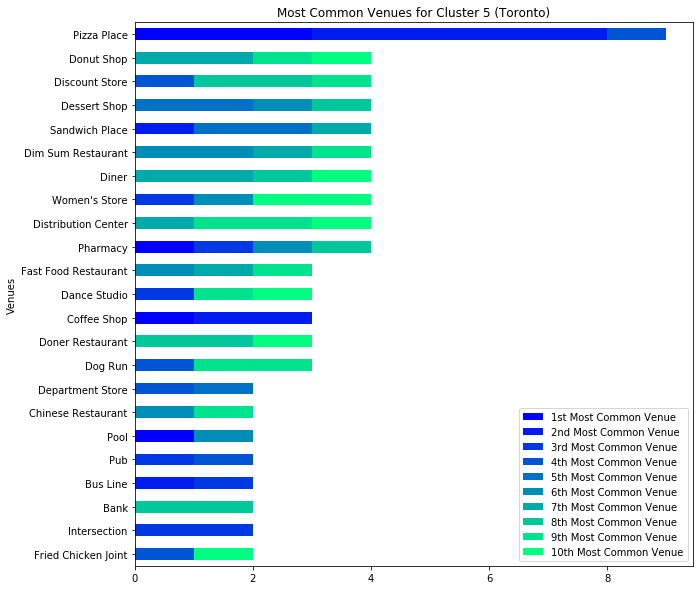

In [228]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '6 (Toronto)', (10,10), 2)

clus

Cluster 6 represents 9% of the Neighborhoods and unlike previus clusters, the most common venue is much more prominent than in the others: Pizza Places. Followed by Pharmacys, Women's stores, Dim Sum (chinese) restaurants, diner, sandwich, donuts, dessert and discount stores.

#### Cluster 7

**Family places, women stores, food.**

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,6,Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
25,North York,6,Park,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Ethiopian Restaurant
30,North York,6,Park,Airport,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
44,Central Toronto,6,Park,Swim School,Bus Line,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Deli / Bodega
50,Downtown Toronto,6,Park,Trail,Playground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
74,York,6,Park,Women's Store,Market,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
90,Etobicoke,6,Park,River,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Deli / Bodega
98,York,6,Park,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Greek Restaurant


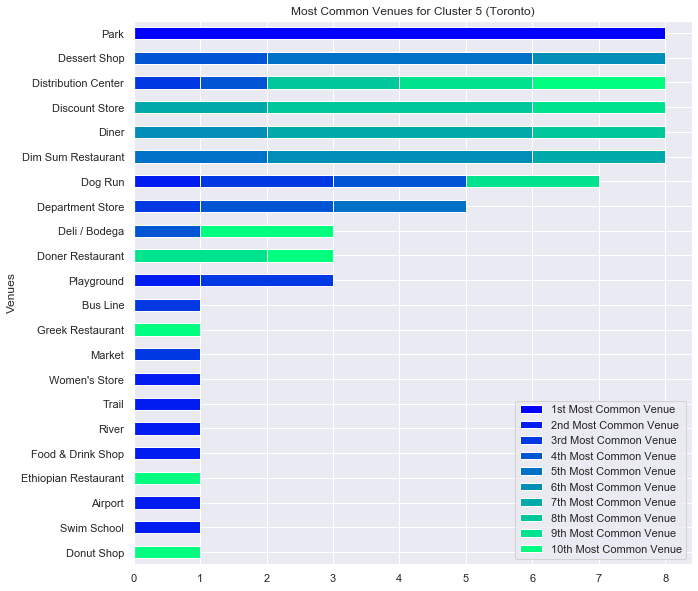

In [532]:
clus = toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

plotVenueCounts(clus, '7 (Toronto)', (10,10), 1)

clus

Cluster 7 represents 8% of the Neighborhoods Dominated by Parks and dessert shops. Followed by Distribution centers, discount stores, diner, dog runs, Dim Sum (chinese) restaurants and department stores.

#### Most common venues for each Cluster
To better understand every cluster, I grouped them to find the mode 

In [231]:
toronto_merged.groupby(['Cluster Labels']).agg(pd.Series.mode)

,Borough,1st Most Common Venue,3rd Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,
0,Downtown Toronto,Coffee Shop,Café,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
1,North York,Park,"[Coffee Shop, Convenience Store, Park]","[Diner, Eastern European Restaurant, Ethiopian...","[Discount Store, Dumpling Restaurant, Empanada...","[Distribution Center, Drugstore, Electronics S...","[Dog Run, Donut Shop, Eastern European Restaur...","[Department Store, Dumpling Restaurant, Women'..."
2,North York,Cafeteria,Doner Restaurant,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store
3,Etobicoke,Golf Course,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
4,Scarborough,Playground,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
5,Etobicoke,Pizza Place,Intersection,Dim Sum Restaurant,"[Diner, Donut Shop]","[Bank, Discount Store, Doner Restaurant]","[Distribution Center, Dog Run]",Women's Store
6,"[North York, York]",Park,"[Dog Run, Playground]",Dim Sum Restaurant,Diner,Discount Store,"[Discount Store, Distribution Center, Dog Run,...","[Deli / Bodega, Distribution Center]"


#### Comparing the clusters

## **Neighborhoods of New York, Manhattan**

In [39]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Load and explore the data

In [235]:
import json

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [236]:
neighborhoods_data = newyork_data['features']

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [237]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Then let's loop through the data and fill the dataframe one row at a time.

In [238]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [239]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [240]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [241]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [242]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [243]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Radius and Limit for the number of avenues returned by Foursquare API

In [244]:
LIMIT = 100

radius = 500


**Function to get the top 100 venues within a radius of 500 meters by Neighborhood**

In [245]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [246]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3176, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


Venues in neighborhoods

In [247]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,70,70,70,70,70,70
Carnegie Hill,90,90,90,90,90,90
Central Harlem,41,41,41,41,41,41
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


In [248]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 329 uniques categories.


**Neighborhood Analisis**

In [249]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

print(manhattan_onehot.shape)
manhattan_onehot.head()

(3176, 330)


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [250]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.00000,0.014286,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.042857,0.000000,0.014286,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.00000,0.011111,0.00,0.000000,0.000000,0.000000,...,0.00,0.011111,0.000000,0.00,0.000000,0.011111,0.033333,0.000000,0.011111,0.033333
2,Central Harlem,0.000000,0.00,0.00,0.04878,0.048780,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.00000,0.040000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.010000,0.010000,0.000000,0.000000,0.010000
4,Chinatown,0.000000,0.00,0.00,0.00000,0.040000,0.00,0.000000,0.000000,0.000000,...,0.00,0.030000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
5,Civic Center,0.000000,0.00,0.00,0.00000,0.030000,0.01,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.010000,0.020000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.00000,0.030000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.010000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.00000,0.020000,0.00,0.000000,0.010000,0.010000,...,0.00,0.020000,0.000000,0.00,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.000000,0.00,0.00,0.00000,0.030000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.010000,0.010000


Top 5 most common venues neighborhood

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [251]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [252]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Boat or Ferry,Coffee Shop,Memorial Site,Wine Shop,Gourmet Shop,Mexican Restaurant,Shopping Mall
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Gym,Pizza Place,Bookstore,Bakery,Japanese Restaurant,Cosmetics Shop,Italian Restaurant
2,Central Harlem,Seafood Restaurant,Bar,African Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Dessert Shop,Library,Gym / Fitness Center,Beer Bar
3,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Italian Restaurant,Ice Cream Shop,Bakery,Gym / Fitness Center,Speakeasy,Hotel,Nightclub
4,Chinatown,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Spa,Dessert Shop,Salon / Barbershop,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop


<a id='item4'></a>

## 4. Cluster Neighborhoods

**K-means Clustering**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

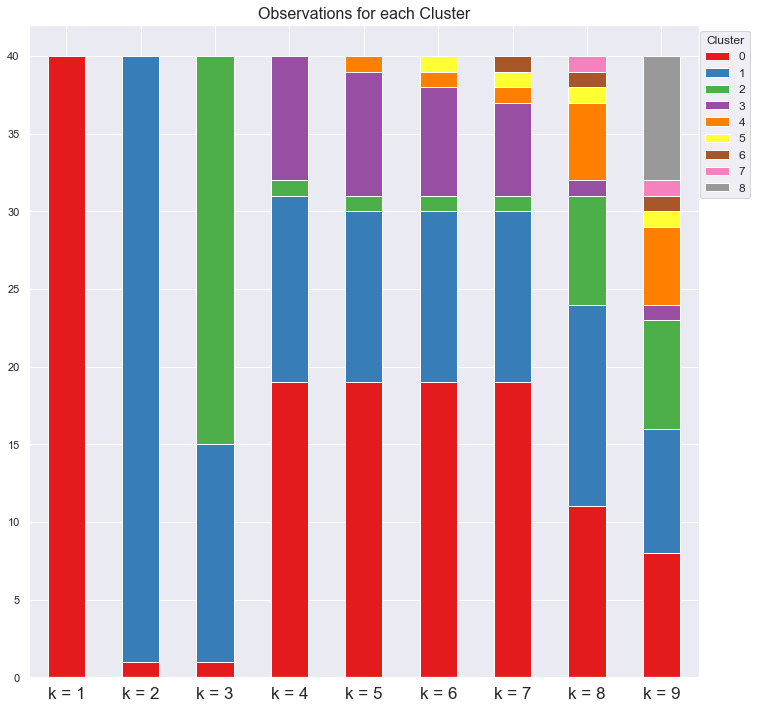

In [472]:
from sklearn.cluster import KMeans

cmap = plt.cm.get_cmap('Set1')

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(manhattan_grouped.drop('Neighborhood', 1))
    distortions.append(kmeanModel.inertia_)
    
    #print(pd.Series(kmeanModel.labels_).value_counts())
    
    if k == 1:
        ClustersCount = pd.Series(kmeanModel.labels_).value_counts().reset_index()
        ClustersCount = ClustersCount.rename(columns={"index": "cluster", 0: "k = "+str(k)})
    else:
        ClustersCount = ClustersCount.merge(
            pd.Series(kmeanModel.labels_).value_counts().reset_index().rename(columns={"index": "cluster", 0: "k = "+str(k)}),
                                                            how='outer')

import seaborn as sns
sns.set()        
        
ax  = ClustersCount.fillna(0).set_index('cluster').T.plot.bar(figsize=(12,12),stacked=True, cmap = cmap)

patches, labels = ax.get_legend_handles_labels()

ax.set_title(label='Observations for each Cluster', fontsize = 16)

ax.legend(patches, labels, title='Cluster', loc='upper center', fontsize=12, bbox_to_anchor=(1.04, 1))

plt.xticks(fontsize=17, rotation=0)

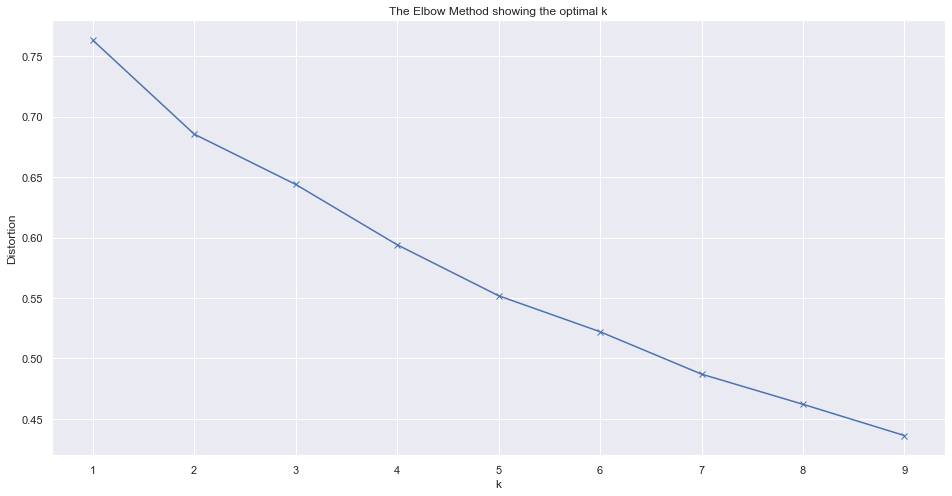

In [434]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As with Toronto, there is not a definitive answer for the best number of K and is better to experiment

In [473]:
# set number of clusters
kclusters = 4

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 1, 1, 1, 3, 0, 1])

In [474]:
if 'Cluster Labels' in neighborhoods_venues_sorted.columns.to_list():
    neighborhoods_venues_sorted.drop(['Cluster Labels'], 1, inplace=True)

Clusters of the top 10 venues for each neighborhood

In [475]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Spa,Dessert Shop,Salon / Barbershop,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Grocery Store,Deli / Bodega,Chinese Restaurant,Mobile Phone Shop,Mexican Restaurant,Supplement Shop,Coffee Shop,Latin American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,Chinese Restaurant,Park,Bakery,American Restaurant,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Sushi Restaurant,Cocktail Bar,Sandwich Place,Bakery,Yoga Studio


In [476]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

### **Clusters Analisis**

In [556]:
manhattan_merged.shape[0]

40

In [558]:
round(manhattan_merged['Cluster Labels'].value_counts()/manhattan_merged.shape[0] * 100,2).sort_index()

0    47.5
1    30.0
2     2.5
3    20.0
Name: Cluster Labels, dtype: float64

#### Cluster 1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,Seafood Restaurant,Bar,African Restaurant,American Restaurant,Chinese Restaurant,French Restaurant,Dessert Shop,Library,Gym / Fitness Center,Beer Bar
8,Upper East Side,Italian Restaurant,Coffee Shop,Bakery,Gym / Fitness Center,Exhibit,Yoga Studio,Wine Shop,Juice Bar,French Restaurant,Spa
9,Yorkville,Italian Restaurant,Coffee Shop,Gym,Bar,Deli / Bodega,Pizza Place,Sushi Restaurant,Wine Shop,Diner,Japanese Restaurant
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Cocktail Bar,Café,Burger Joint,Gym,Gym / Fitness Center,Playground
12,Upper West Side,Italian Restaurant,Bakery,Bar,Coffee Shop,Thai Restaurant,Shoe Store,Seafood Restaurant,Café,Bagel Shop,Ice Cream Shop
13,Lincoln Square,Plaza,Café,Italian Restaurant,Performing Arts Venue,Theater,Concert Hall,Wine Shop,American Restaurant,Gym / Fitness Center,Indie Movie Theater
17,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Italian Restaurant,Ice Cream Shop,Bakery,Gym / Fitness Center,Speakeasy,Hotel,Nightclub
18,Greenwich Village,Italian Restaurant,Café,French Restaurant,Sushi Restaurant,Gym,Dessert Shop,Coffee Shop,Chinese Restaurant,Sandwich Place,Pilates Studio
19,East Village,Bar,Pizza Place,Ice Cream Shop,Mexican Restaurant,Wine Bar,Coffee Shop,Cocktail Bar,Speakeasy,Ramen Restaurant,Korean Restaurant
20,Lower East Side,Chinese Restaurant,Café,Bakery,Japanese Restaurant,Coffee Shop,Park,Ramen Restaurant,Art Gallery,Pizza Place,Filipino Restaurant


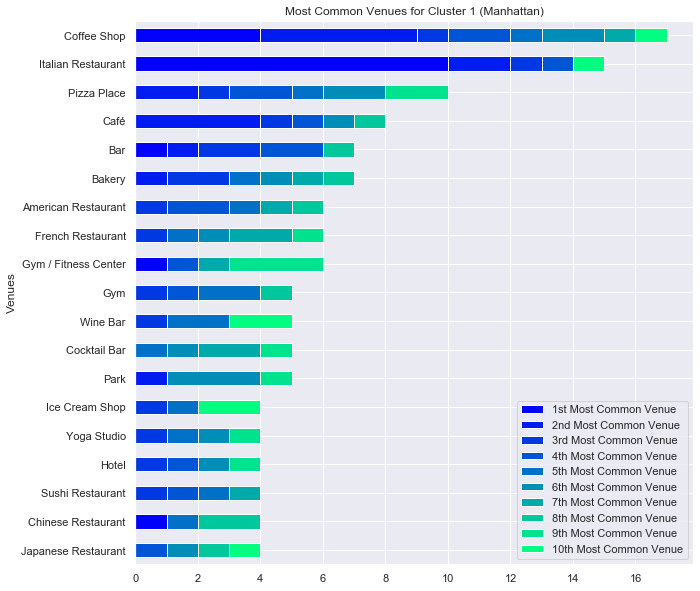

In [477]:
clus = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

plotVenueCounts(clus, '1 (Manhattan)', (10,10), 4)

clus

With 48% of the neighborhoods, Cluster 1 is the main cluster for Manhattan. Dominated by Coffee shops and Italian Restaurants. Followed by Pizza places, cafes, bars, bakery, gyms/yoga, American, French, Japanese and Chinese restaurants.

#### Cluster 2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
1,Chinatown,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Spa,Dessert Shop,Salon / Barbershop,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop
14,Clinton,Italian Restaurant,Gym / Fitness Center,Theater,Coffee Shop,Spa,Thai Restaurant,Cocktail Bar,Sandwich Place,Gym,Hotel
15,Midtown,Coffee Shop,Hotel,Theater,Sandwich Place,Sporting Goods Shop,Steakhouse,Gym,Clothing Store,Café,Bakery
16,Murray Hill,Sandwich Place,Hotel,Bar,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Pizza Place,Burger Joint,Gym / Fitness Center,Mediterranean Restaurant
22,Little Italy,Café,Bakery,Hotel,Bubble Tea Shop,Sandwich Place,Cocktail Bar,Chinese Restaurant,Mediterranean Restaurant,Thai Restaurant,Ice Cream Shop
28,Battery Park City,Park,Hotel,Gym,Boat or Ferry,Coffee Shop,Memorial Site,Wine Shop,Gourmet Shop,Mexican Restaurant,Shopping Mall
29,Financial District,Coffee Shop,Bar,Pizza Place,Hotel,Cocktail Bar,Park,American Restaurant,Mexican Restaurant,Japanese Restaurant,Gym / Fitness Center
32,Civic Center,Coffee Shop,French Restaurant,Hotel,Cocktail Bar,Yoga Studio,Park,Spa,Sushi Restaurant,American Restaurant,Gym / Fitness Center
33,Midtown South,Korean Restaurant,Hotel,Japanese Restaurant,Dessert Shop,Burger Joint,Clothing Store,American Restaurant,Gym / Fitness Center,Coffee Shop,Salad Place


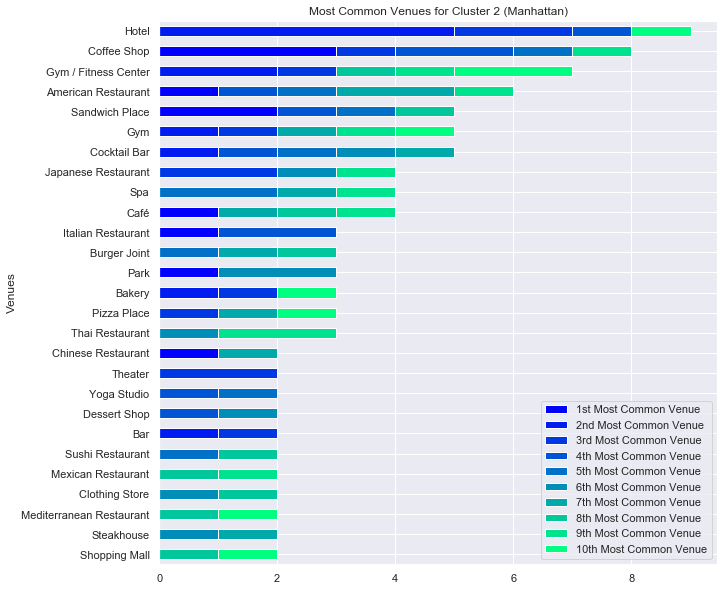

In [478]:
clus = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

plotVenueCounts(clus, '2 (Manhattan)', (10,10), 2)

clus

With 30% of the neighborhoods, Cluster 2 is the second main cluster for Manhattan. Dominated by Hotels, coffes, gyms, cocktail bars, american, japanese, italian restaurants and spa.

#### Cluster 3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Bar,Gas Station,Baseball Field,Harbor / Marina,German Restaurant,Cocktail Bar,Coffee Shop,Heliport


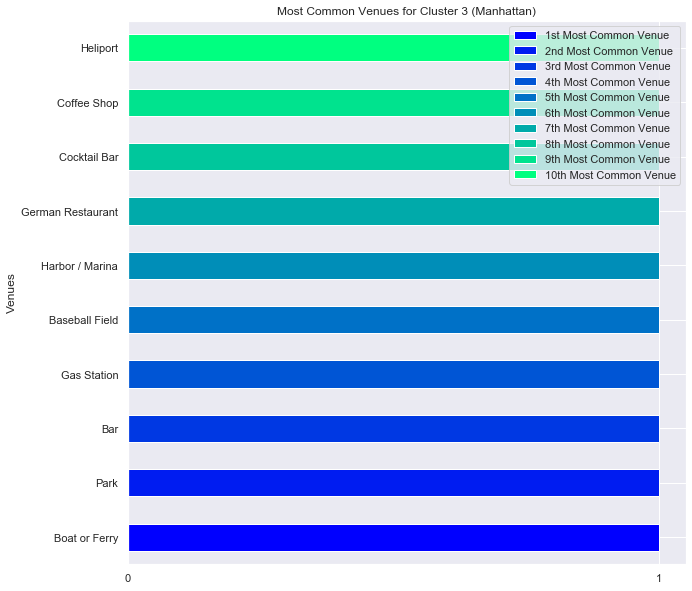

In [479]:
clus = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

plotVenueCounts(clus, '3 (Manhattan)', (10,10), 1)

clus

Cluster 3 consist of only one area. Dominated by Boat/Ferry and harbor/marina, Parks, Bars/cocktails, gas stations.

#### Cluster 4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Deli / Bodega,Chinese Restaurant,Mobile Phone Shop,Mexican Restaurant,Supplement Shop,Coffee Shop,Latin American Restaurant
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,Chinese Restaurant,Park,Bakery,American Restaurant,Frozen Yogurt Shop
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Sushi Restaurant,Cocktail Bar,Sandwich Place,Bakery,Yoga Studio
5,Manhattanville,Coffee Shop,Seafood Restaurant,Italian Restaurant,Park,Mexican Restaurant,Chinese Restaurant,Spanish Restaurant,Check Cashing Service,Bank,Bar
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Thai Restaurant,Latin American Restaurant,Convenience Store,Spanish Restaurant,Liquor Store,Gas Station,Taco Place
11,Roosevelt Island,Pizza Place,Park,Gym,Coffee Shop,Kosher Restaurant,Greek Restaurant,Dog Run,Liquor Store,Sandwich Place,Scenic Lookout
26,Morningside Heights,Park,Bookstore,Coffee Shop,American Restaurant,Deli / Bodega,Burger Joint,New American Restaurant,Outdoor Sculpture,Grocery Store,Greek Restaurant
36,Tudor City,Park,Café,Greek Restaurant,Mexican Restaurant,Deli / Bodega,Diner,Coffee Shop,Gym / Fitness Center,Restaurant,Garden


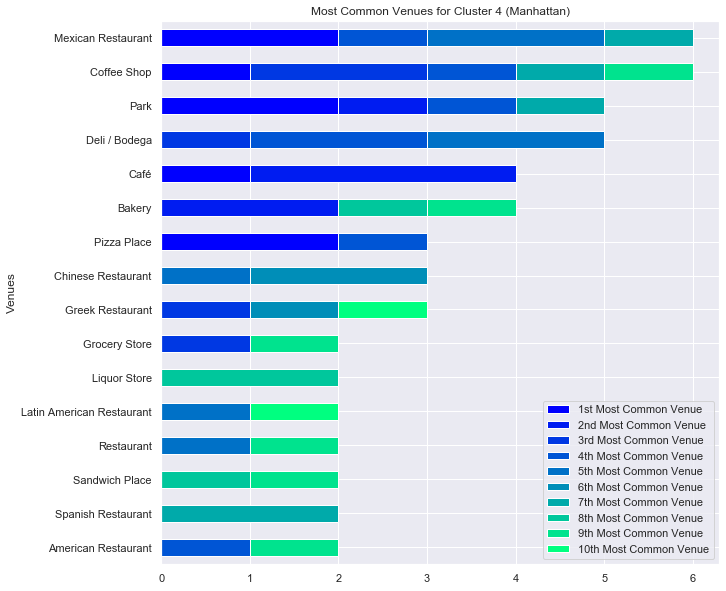

In [531]:
clus = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

plotVenueCounts(clus, '4 (Manhattan)', (10,10), 2)

clus

Cluster 4 consist of 20% of the neighborhoods and is dominated by Mexican Restaurants, cafes, parks, bodegas, bakery, Pizza places. Followed by  Chinese, Greek, Latin american, spanish and american restaurants.

#### Most common venues for each Cluster
To better understand every cluster, I grouped them to find the mode 

In [481]:
manhattan_merged.groupby(['Cluster Labels']).agg(pd.Series.mode)

,Borough,1st Most Common Venue,2nd Most Common Venue,6th Most Common Venue,9th Most Common Venue
Cluster Labels,,,,,
0,Manhattan,Italian Restaurant,Coffee Shop,Park,Gym / Fitness Center
1,Manhattan,Coffee Shop,Hotel,Park,Thai Restaurant
2,Manhattan,Boat or Ferry,Park,Harbor / Marina,Coffee Shop
3,Manhattan,"[Mexican Restaurant, Park, Pizza Place]",Café,Chinese Restaurant,"[American Restaurant, Bakery, Bank, Coffee Sho..."


### **Neighborhoods of New York**

In [484]:
import json

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [485]:
neighborhoods_data = newyork_data['features']

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [486]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Then let's loop through the data and fill the dataframe one row at a time.

In [487]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [488]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [489]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the newYork_data data.

In [490]:
newYork_data = neighborhoods
newYork_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Let's get the geographical coordinates of newYork_data.

In [491]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


As we did with all of New York City, let's visualizat newYork_data the neighborhoods in it.

In [492]:
# create map of newYork_data using latitude and longitude values
map_newYork_data = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(newYork_data['Latitude'], newYork_data['Longitude'], newYork_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newYork_data)  
    
map_newYork_data

Radius and Limit for the number of avenues returned by Foursquare API

In [493]:
LIMIT = 100

radius = 500


**Function to get the top 100 venues within a radius of 500 meters by Neighborhood**

In [494]:
newYork_data_venues = getNearbyVenues(names=newYork_data['Neighborhood'],
                                   latitudes=newYork_data['Latitude'],
                                   longitudes=newYork_data['Longitude']
                                  )



Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [495]:
print(newYork_data_venues.shape)
newYork_data_venues.head()

(10071, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


Venues in neighborhoods

In [496]:
newYork_data_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,27,27,27,27,27,27
Annadale,13,13,13,13,13,13
Arden Heights,5,5,5,5,5,5
Arlington,5,5,5,5,5,5
Arrochar,19,19,19,19,19,19
...,...,...,...,...,...,...
Woodhaven,24,24,24,24,24,24
Woodlawn,25,25,25,25,25,25
Woodrow,20,20,20,20,20,20


In [497]:
print('There are {} uniques categories.'.format(len(newYork_data_venues['Venue Category'].unique())))

There are 427 uniques categories.


**Neighborhood Analisis**

In [498]:
# one hot encoding
newYork_data_onehot = pd.get_dummies(newYork_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newYork_data_onehot['Neighborhood'] = newYork_data_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newYork_data_onehot.columns[-1]] + list(newYork_data_onehot.columns[:-1])
newYork_data_onehot = newYork_data_onehot[fixed_columns]

print(newYork_data_onehot.shape)
newYork_data_onehot.head()

(10071, 427)


,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [499]:
newYork_data_grouped = newYork_data_onehot.groupby('Neighborhood').mean().reset_index()
newYork_data_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Woodhaven,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
296,Woodlawn,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
297,Woodrow,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
298,Woodside,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0


Top 5 most common venues neighborhood

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [500]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [501]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newYork_data_grouped['Neighborhood']

for ind in np.arange(newYork_data_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newYork_data_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Supermarket,Chinese Restaurant,Deli / Bodega,Smoke Shop,Mexican Restaurant,Gas Station,Breakfast Spot,Spanish Restaurant,Fast Food Restaurant
1,Annadale,American Restaurant,Pizza Place,Food,Pharmacy,Sports Bar,Diner,Restaurant,Train Station,Pub,Deli / Bodega
2,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Home Service,Pizza Place,Fast Food Restaurant,Event Service,Event Space,Exhibit,Eye Doctor
3,Arlington,Deli / Bodega,Intersection,American Restaurant,Bus Stop,Grocery Store,Yemeni Restaurant,Financial or Legal Service,Exhibit,Eye Doctor,Factory
4,Arrochar,Deli / Bodega,Italian Restaurant,Bus Stop,Hotel,Food Truck,Middle Eastern Restaurant,Pharmacy,Bagel Shop,Outdoors & Recreation,Sandwich Place


<a id='item4'></a>

## 4. Cluster Neighborhoods

**K-means Clustering**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

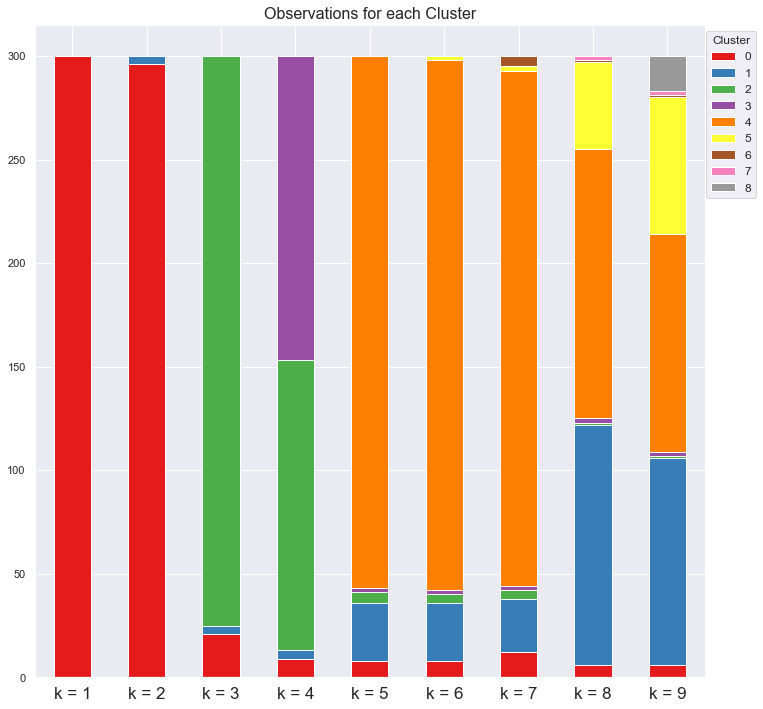

In [506]:
from sklearn.cluster import KMeans

cmap = plt.cm.get_cmap('Set1')

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(newYork_data_grouped.drop('Neighborhood', 1))
    distortions.append(kmeanModel.inertia_)
    
    if k == 1:
        ClustersCount = pd.Series(kmeanModel.labels_).value_counts().reset_index()
        ClustersCount = ClustersCount.rename(columns={"index": "cluster", 0: "k = "+str(k)})
    else:
        ClustersCount = ClustersCount.merge(
            pd.Series(kmeanModel.labels_).value_counts().reset_index().rename(columns={"index": "cluster", 0: "k = "+str(k)}),
                                                            how='outer')

import seaborn as sns
sns.set()        
        
ax  = ClustersCount.fillna(0).set_index('cluster').T.plot.bar(figsize=(12,12),stacked=True, cmap = cmap)

patches, labels = ax.get_legend_handles_labels()

ax.set_title(label='Observations for each Cluster', fontsize = 16)

ax.legend(patches, labels, title='Cluster', loc='upper center', fontsize=12, bbox_to_anchor=(1.04, 1))

plt.xticks(fontsize=17, rotation=0)

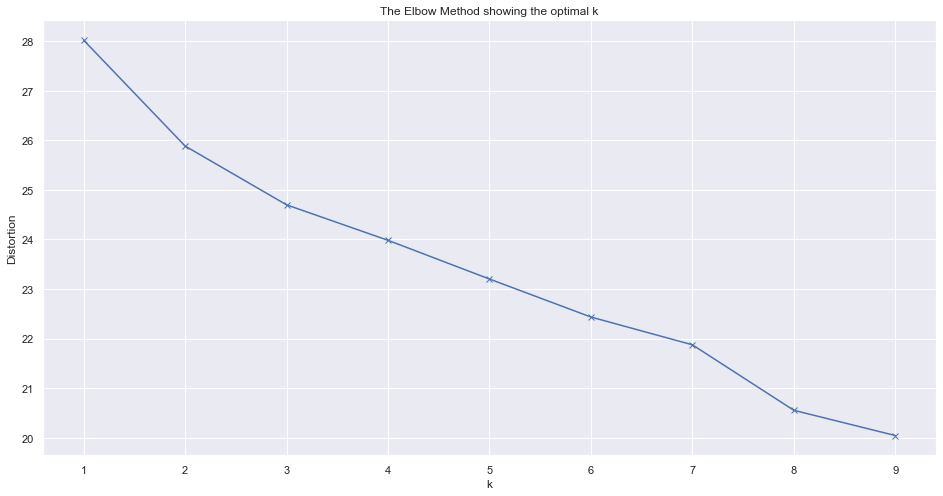

In [503]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As with Toronto, there is not a definitive answer for the best number of K and is better to experiment

In [507]:
# set number of clusters
kclusters = 7

newYork_data_grouped_clustering = newYork_data_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newYork_data_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 1, 1, 4, 4, 4, 4, 4])

In [508]:
if 'Cluster Labels' in neighborhoods_venues_sorted.columns.to_list():
    neighborhoods_venues_sorted.drop(['Cluster Labels'], 1, inplace=True)

Clusters of the top 10 venues for each neighborhood

In [509]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

newYork_data_merged = newYork_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
newYork_data_merged = newYork_data_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newYork_data_merged.dropna(inplace=True)

newYork_data_merged = newYork_data_merged.astype({'Cluster Labels': 'int32'})

newYork_data_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,4,Pharmacy,Ice Cream Shop,Dessert Shop,Laundromat,Gas Station,Donut Shop,Sandwich Place,Caribbean Restaurant,Eye Doctor,Factory
1,Bronx,Co-op City,40.874294,-73.829939,4,Bus Station,Fried Chicken Joint,Pizza Place,Basketball Court,Baseball Field,Chinese Restaurant,Park,Grocery Store,Bagel Shop,Pharmacy
2,Bronx,Eastchester,40.887556,-73.827806,0,Caribbean Restaurant,Bus Station,Diner,Pizza Place,Bowling Alley,Metro Station,Seafood Restaurant,Fast Food Restaurant,Platform,Donut Shop
3,Bronx,Fieldston,40.895437,-73.905643,2,Plaza,Yemeni Restaurant,Filipino Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm
4,Bronx,Riverdale,40.890834,-73.912585,2,Park,Food Truck,Bus Station,Gym,Home Service,Playground,Plaza,Bank,Flea Market,Event Service


In [510]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newYork_data_merged['Latitude'], newYork_data_merged['Longitude'], newYork_data_merged['Neighborhood'], newYork_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [559]:
round(newYork_data_merged['Cluster Labels'].value_counts()/newYork_data_merged.shape[0] * 100,2).sort_index()

0     3.95
1     8.55
2     1.32
3     0.66
4    83.22
5     0.66
6     1.64
Name: Cluster Labels, dtype: float64

<a id='item5'></a>

### **Clusters Analisis**

#### Cluster 1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Eastchester,Caribbean Restaurant,Bus Station,Diner,Pizza Place,Bowling Alley,Metro Station,Seafood Restaurant,Fast Food Restaurant,Platform,Donut Shop
26,Soundview,Chinese Restaurant,Grocery Store,Playground,Burger Joint,Liquor Store,Pharmacy,Mobile Phone Shop,Basketball Court,Video Store,Fried Chicken Joint
45,Edenwald,Supermarket,Gas Station,Bus Station,Grocery Store,Fish Market,Athletics & Sports,Yemeni Restaurant,Filipino Restaurant,Exhibit,Eye Doctor
73,Starrett City,Chinese Restaurant,Cosmetics Shop,Pizza Place,Shopping Mall,Donut Shop,Caribbean Restaurant,Bus Stop,Bus Station,American Restaurant,Pharmacy
158,Fresh Meadows,Bus Station,Chinese Restaurant,Pharmacy,Grocery Store,Home Service,Pizza Place,Vegetarian / Vegan Restaurant,Playground,Food Truck,Cosmetics Shop
164,South Jamaica,Bakery,Caribbean Restaurant,Sandwich Place,Grocery Store,Bus Station,Vegetarian / Vegan Restaurant,Supermarket,Deli / Bodega,Eye Doctor,Field
169,Rosedale,Bus Station,Fried Chicken Joint,Liquor Store,Cosmetics Shop,Construction & Landscaping,Sandwich Place,Pharmacy,Chinese Restaurant,Smoke Shop,Caribbean Restaurant
183,Jamaica Estates,Intersection,Eye Doctor,Indian Restaurant,Bus Station,Yemeni Restaurant,Filipino Restaurant,Event Service,Event Space,Exhibit,Factory
212,Oakwood,Bar,Bus Station,Lawyer,Financial or Legal Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm
265,Pomonok,Japanese Restaurant,Bowling Alley,Bar,Scenic Lookout,Chinese Restaurant,Pizza Place,Playground,Bus Station,Shop & Service,Supermarket


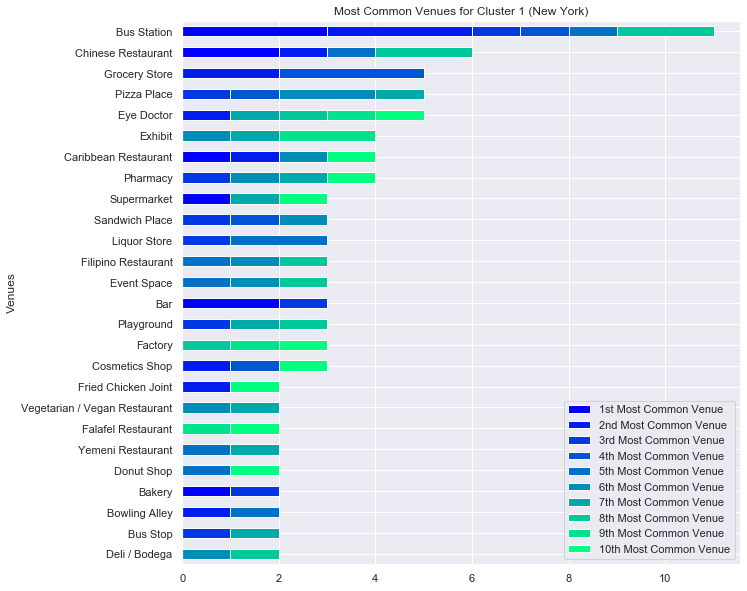

In [511]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 0, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '1 (New York)', (10,10), 2)

clus

Cluster 1 consist of 4% of the neighborhoods and is dominated by Bus stations. Followed by Chinese, Caribean, Filipino, Falafel and Yemeni restaurants. Pizza places, Eye doctors, Exhibit and Pharmacy.

#### Cluster 2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Longwood,Deli / Bodega,Diner,Donut Shop,Plaza,Fast Food Restaurant,Latin American Restaurant,Community Center,Sandwich Place,Grocery Store,Falafel Restaurant
32,Van Nest,Deli / Bodega,Pizza Place,Bus Station,Middle Eastern Restaurant,Caribbean Restaurant,BBQ Joint,Coffee Shop,Hookah Bar,Donut Shop,Yemeni Restaurant
39,Edgewater Park,Italian Restaurant,Deli / Bodega,Pizza Place,Asian Restaurant,Juice Bar,Park,Donut Shop,Pub,Coffee Shop,Chinese Restaurant
89,Ocean Hill,Deli / Bodega,Grocery Store,Supermarket,Playground,Southern / Soul Food Restaurant,Food,Pizza Place,Chinese Restaurant,Mexican Restaurant,Bakery
148,South Ozone Park,Park,Deli / Bodega,Bar,Fast Food Restaurant,Food,Sandwich Place,Donut Shop,Hotel,Food Truck,Flower Shop
150,Whitestone,Dance Studio,Bubble Tea Shop,Deli / Bodega,Candy Store,Financial or Legal Service,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm
159,Briarwood,Deli / Bodega,Convenience Store,Bus Station,Fast Food Restaurant,Mexican Restaurant,Arts & Crafts Store,Sushi Restaurant,Indian Restaurant,Coffee Shop,Field
171,Broad Channel,Deli / Bodega,Sporting Goods Shop,Dive Bar,Other Nightlife,Pizza Place,Yemeni Restaurant,Filipino Restaurant,Event Space,Exhibit,Eye Doctor
193,Brookville,Deli / Bodega,Yemeni Restaurant,Fish & Chips Shop,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market
195,North Corona,Deli / Bodega,Gym / Fitness Center,Gym,Bakery,Pizza Place,Hotel Bar,Mexican Restaurant,Caribbean Restaurant,Mobile Phone Shop,Fast Food Restaurant


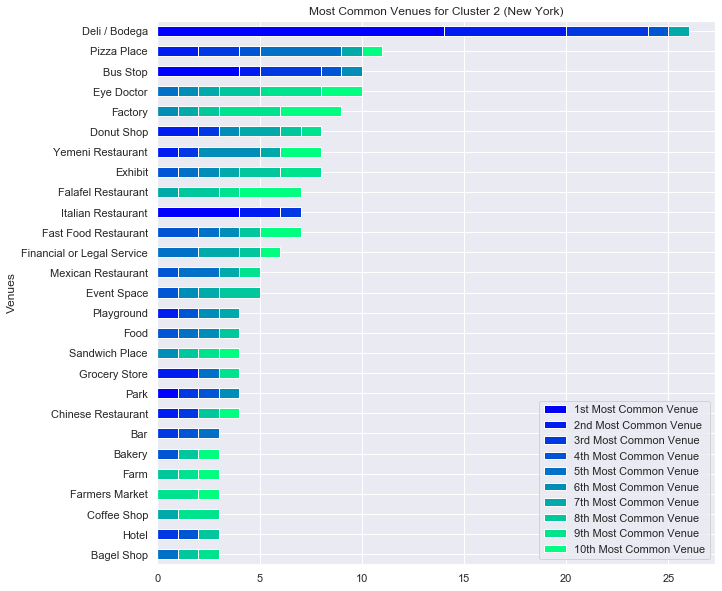

In [513]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 1, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '2 (New York)', (10,10), 3)

clus

Cluster 2 consist of 9% of the neighborhoods and is dominated by Deli /Bodegas. Followed by Pizza places, Bus Stops, Eye Doctor, Factories, exhibit, donut shop.Fast Food, Yemeni, Falafel, Italian, Maxican, Chinese restaurants.

#### Cluster 3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fieldston,Plaza,Yemeni Restaurant,Filipino Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm
4,Riverdale,Park,Food Truck,Bus Station,Gym,Home Service,Playground,Plaza,Bank,Flea Market,Event Service
27,Clason Point,Park,Grocery Store,Boat or Ferry,Pool,Bus Stop,South American Restaurant,Yemeni Restaurant,Field,Exhibit,Eye Doctor
303,Bayswater,Park,Playground,Yemeni Restaurant,Field,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant


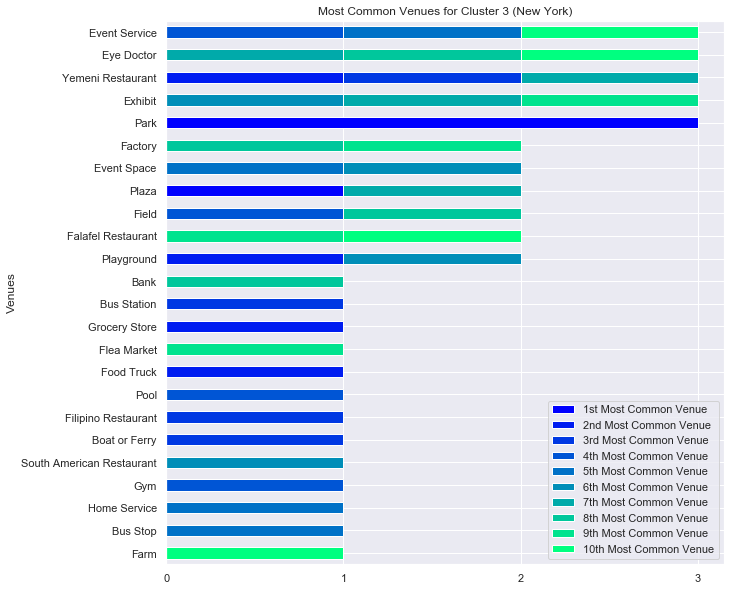

In [515]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 2, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '3 (New York)', (10,10), 1)

clus

Cluster 3 consist of 1.3% of the neighborhoods and is dominated by Parks, many Event services, Eye Doctors, Yemeni Restaurants, Exhibits. Followed by  Chinese, Greek, Latin american, spanish and american restaurants.

#### Cluster 4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,Mill Island,Pool,Yemeni Restaurant,Financial or Legal Service,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm
238,Butler Manor,Baseball Field,Pool,Convenience Store,Bus Stop,Yemeni Restaurant,Filipino Restaurant,Event Space,Exhibit,Eye Doctor,Factory


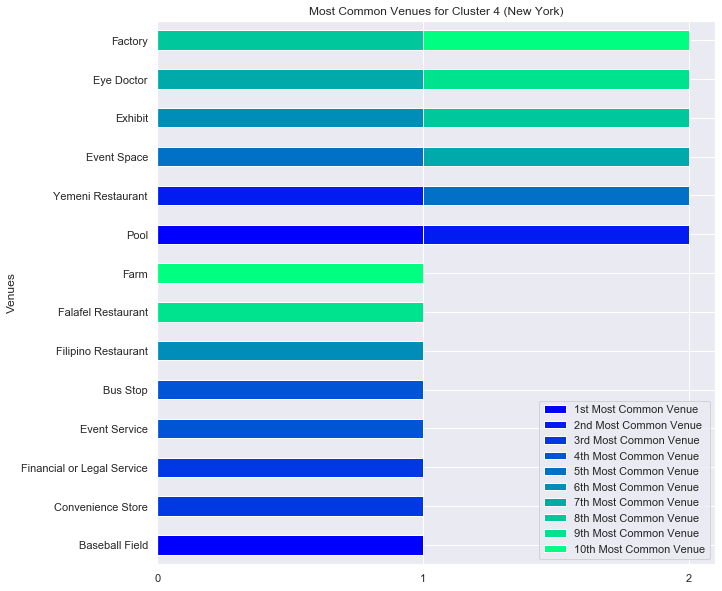

In [517]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 3, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '4 (New York)', (10,10), 1)

clus

Cluster 4 consist of 0.7% of the neighborhoods and is dominated by Factories, Eye Doctors, Exhibit, Event Space and services, Yemeni restaurants, Pools, Baseball fields. Followed by falafel and filipino restaurants.

#### Cluster 5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pharmacy,Ice Cream Shop,Dessert Shop,Laundromat,Gas Station,Donut Shop,Sandwich Place,Caribbean Restaurant,Eye Doctor,Factory
1,Co-op City,Bus Station,Fried Chicken Joint,Pizza Place,Basketball Court,Baseball Field,Chinese Restaurant,Park,Grocery Store,Bagel Shop,Pharmacy
5,Kingsbridge,Pizza Place,Sandwich Place,Bar,Supermarket,Mexican Restaurant,Fast Food Restaurant,Bakery,Spanish Restaurant,Fried Chicken Joint,Latin American Restaurant
6,Marble Hill,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pizza Place,Steakhouse,Supplement Shop,Miscellaneous Shop,Tennis Stadium,Shopping Mall
7,Woodlawn,Pizza Place,Pub,Playground,Food & Drink Shop,Deli / Bodega,Rental Car Location,Grocery Store,Park,Bar,Pharmacy
...,...,...,...,...,...,...,...,...,...,...,...
298,Allerton,Pizza Place,Supermarket,Chinese Restaurant,Deli / Bodega,Smoke Shop,Mexican Restaurant,Gas Station,Breakfast Spot,Spanish Restaurant,Fast Food Restaurant
299,Kingsbridge Heights,Pizza Place,Mexican Restaurant,Bus Station,Coffee Shop,Intersection,Check Cashing Service,Metro Station,Fried Chicken Joint,Food Truck,Spanish Restaurant
300,Erasmus,Caribbean Restaurant,Grocery Store,Yoga Studio,Playground,Music Venue,Supermarket,Furniture / Home Store,Mobile Phone Shop,Gym / Fitness Center,Bank
301,Hudson Yards,American Restaurant,Hotel,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Dog Run,Burger Joint,Spanish Restaurant,Boat or Ferry,Gym


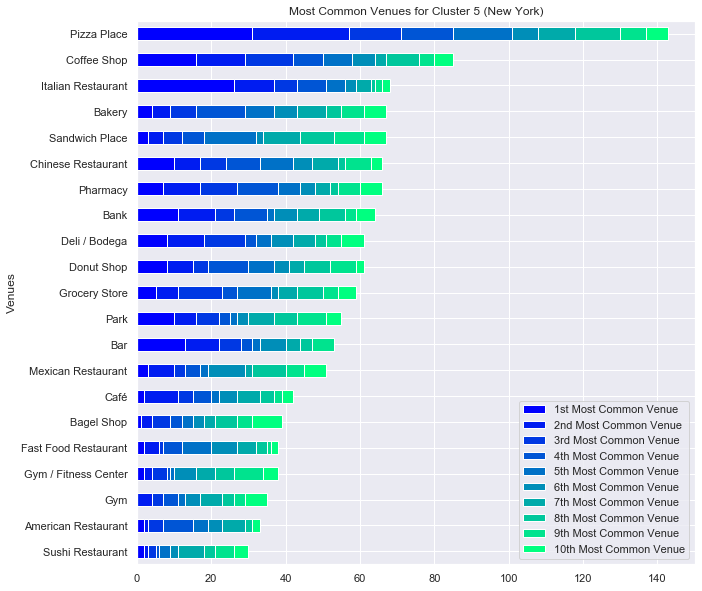

In [520]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 4, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '5 (New York)', (10,10), 30)

clus

Cluster 5 consist of 83% of the neighborhoods and is dominated heavily by Pizza Places. Followed by Cafes, Pharmacy, Bank. Italian, Chinese, Mexican, American and Japanese restaurants. Bakery, Sandwish, donuts.

#### Cluster 6

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
192,Somerville,Park,Yemeni Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market
203,Todt Hill,Park,Yemeni Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market


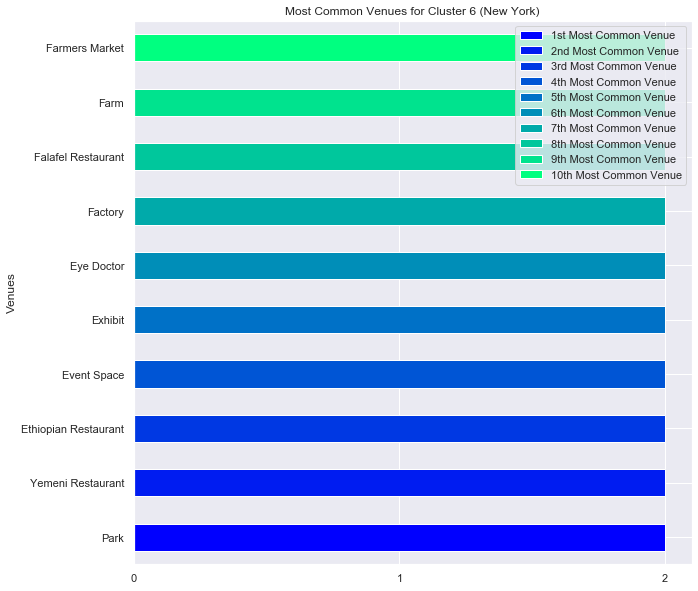

In [522]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 5, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '6 (New York)', (10,10), 1)

clus

Cluster 6 consist of 0.7% of the neighborhoods and is dominated by Parks. Followed by Yameni, Ethiopian, Falafel restaurants. Event spaces and Exhibit. Eye Doctors.

#### Cluster 7

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
85,Sea Gate,Beach,Bus Line,Bus Station,Spa,Lighthouse,Yemeni Restaurant,Filipino Restaurant,Exhibit,Eye Doctor,Factory
172,Breezy Point,Trail,Beach,Monument / Landmark,Yemeni Restaurant,Filipino Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant
179,Neponsit,Beach,Bar,Yemeni Restaurant,Financial or Legal Service,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market
204,South Beach,Deli / Bodega,Beach,Pier,Bus Stop,Athletics & Sports,Yemeni Restaurant,Filipino Restaurant,Exhibit,Eye Doctor,Factory
302,Hammels,Beach,Fried Chicken Joint,Gym / Fitness Center,Deli / Bodega,Café,Building,Shoe Store,Diner,Fast Food Restaurant,Bus Station


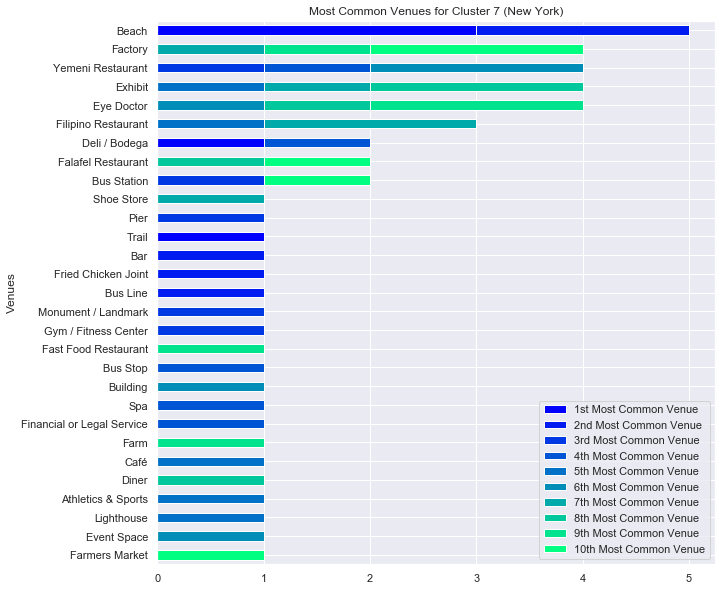

In [524]:
clus = newYork_data_merged.loc[newYork_data_merged['Cluster Labels'] == 6, newYork_data_merged.columns[[1] + list(range(5, newYork_data_merged.shape[1]))]]

plotVenueCounts(clus, '7 (New York)', (10,10), 1)

clus

Cluster 7 consist of 1.6% of the neighborhoods and is dominated by the Beach. Followed by Yameni, Filipino, Falafel restaurants. Factory, Exhibit, Eye Doctors. Deli bodega, bus station.

### Comparing Most common venues for each Cluster
To better understand every cluster, I grouped them to find the mode 

In [525]:
newYork_data_merged.groupby(['Cluster Labels']).agg(pd.Series.mode)

,Borough,1st Most Common Venue,2nd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,9th Most Common Venue
Cluster Labels,,,,,,,
0,Queens,Bus Station,Bus Station,Grocery Store,Liquor Store,Pizza Place,Exhibit
1,Staten Island,Deli / Bodega,Deli / Bodega,Fast Food Restaurant,Pizza Place,Yemeni Restaurant,"[Eye Doctor, Factory]"
2,Bronx,Park,"[Food Truck, Grocery Store, Playground, Yemeni...","[Event Service, Field, Gym, Pool]","[Bus Stop, Event Service, Event Space, Home Se...","[Event Space, Exhibit, Playground, South Ameri...","[Exhibit, Factory, Falafel Restaurant, Flea Ma..."
3,"[Brooklyn, Staten Island]","[Baseball Field, Pool]","[Pool, Yemeni Restaurant]","[Bus Stop, Event Service]","[Event Space, Yemeni Restaurant]","[Exhibit, Filipino Restaurant]","[Eye Doctor, Falafel Restaurant]"
4,Brooklyn,Pizza Place,Pizza Place,Pizza Place,Pizza Place,Mexican Restaurant,Exhibit
5,"[Queens, Staten Island]",Park,Yemeni Restaurant,Event Space,Exhibit,Eye Doctor,Farm
6,Queens,Beach,Beach,"[Bus Stop, Deli / Bodega, Financial or Legal S...","[Athletics & Sports, Café, Exhibit, Filipino R...",Yemeni Restaurant,Eye Doctor
